In [2]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


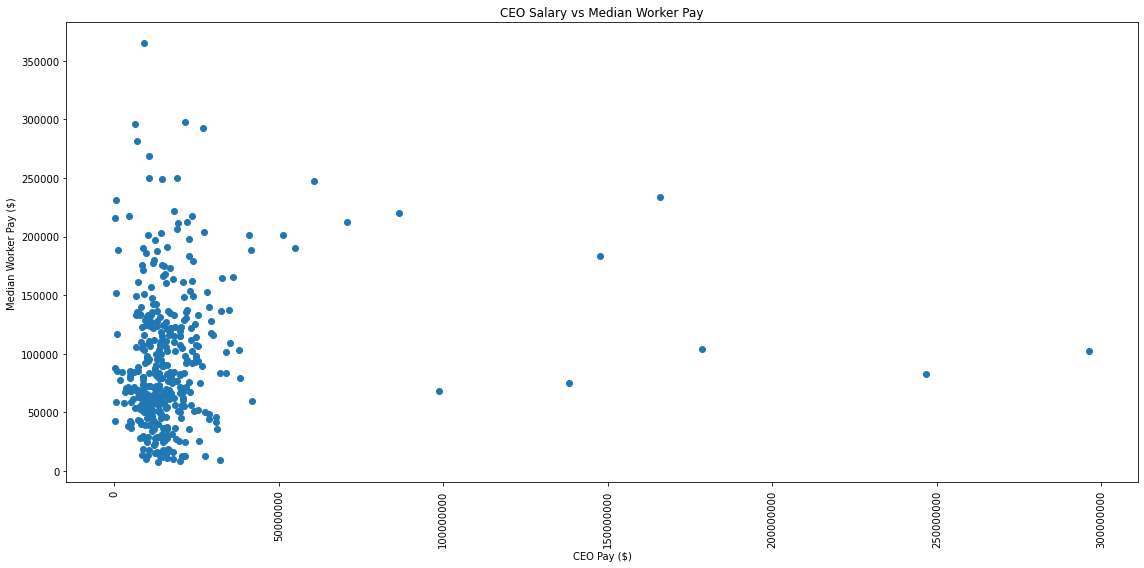

In [5]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (16,8))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorker.png")

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


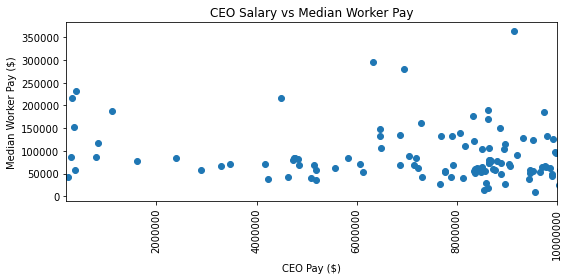

In [6]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?
#Zoomed in plot

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.xlim([200000,10000000])
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorkerZoomed.png")

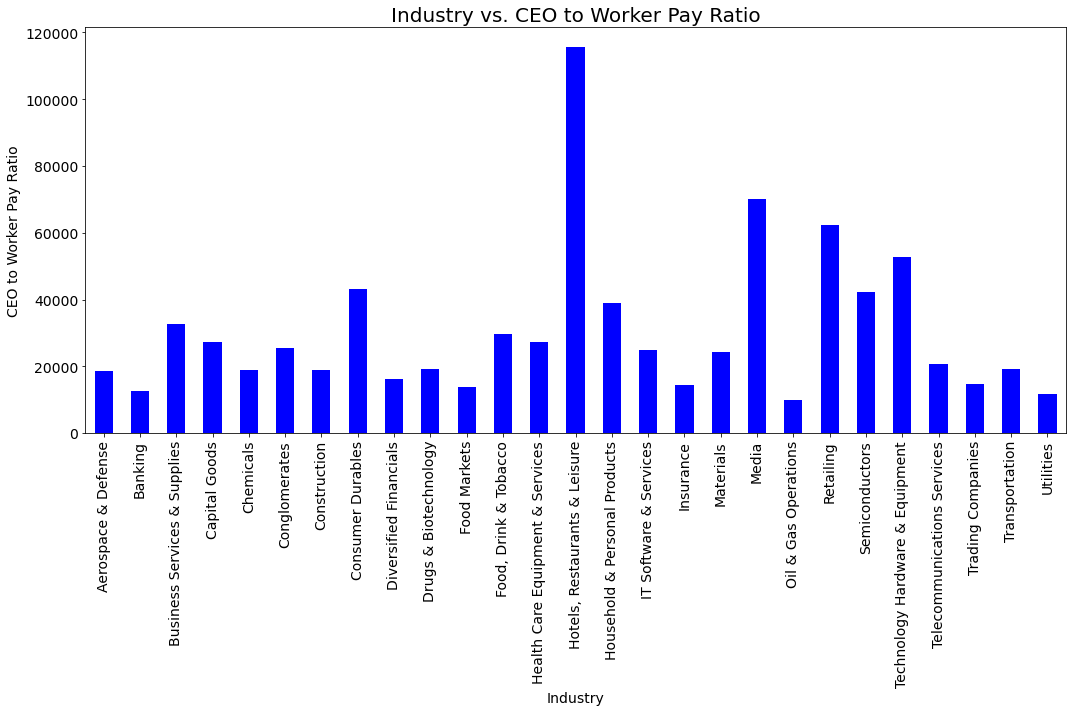

In [7]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary to Worker Pay Multiplier"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("CEO to Worker Pay Ratio",fontsize = 14)
plt.title("Industry vs. CEO to Worker Pay Ratio",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/CEOMult_perIndustry.png")

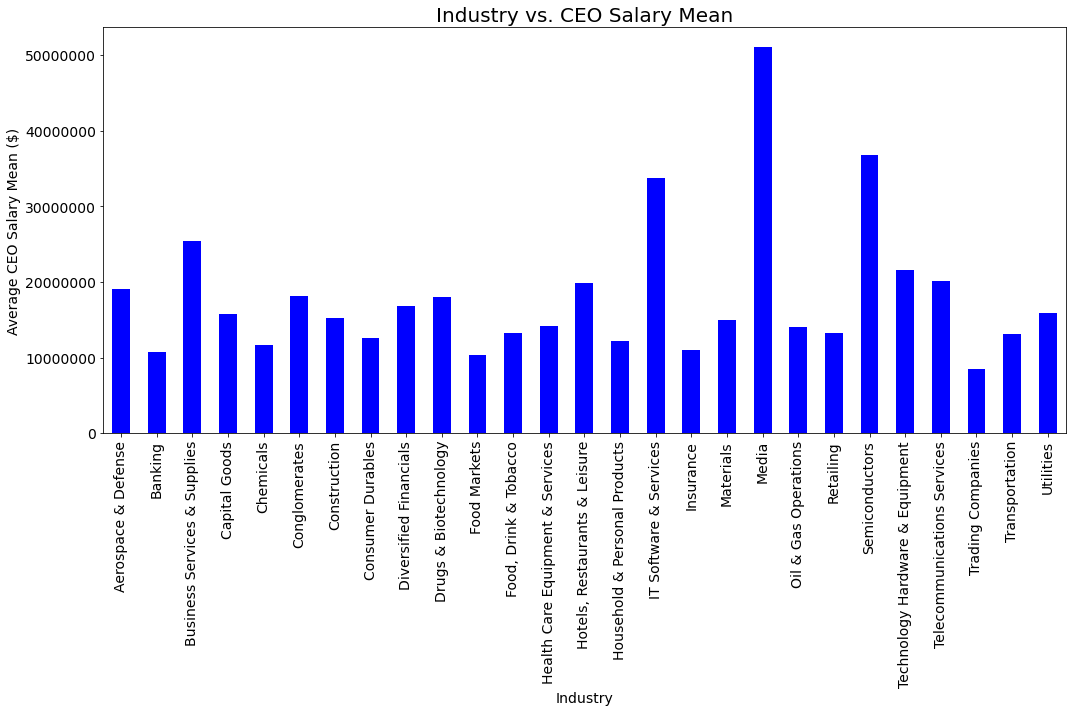

In [8]:
#Do industries that CEOs earn the most in and their workers earn the most in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Average CEO Salary Mean ($)",fontsize = 14)
plt.title("Industry vs. CEO Salary Mean",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/AvgCEO_PerIndustry.png")

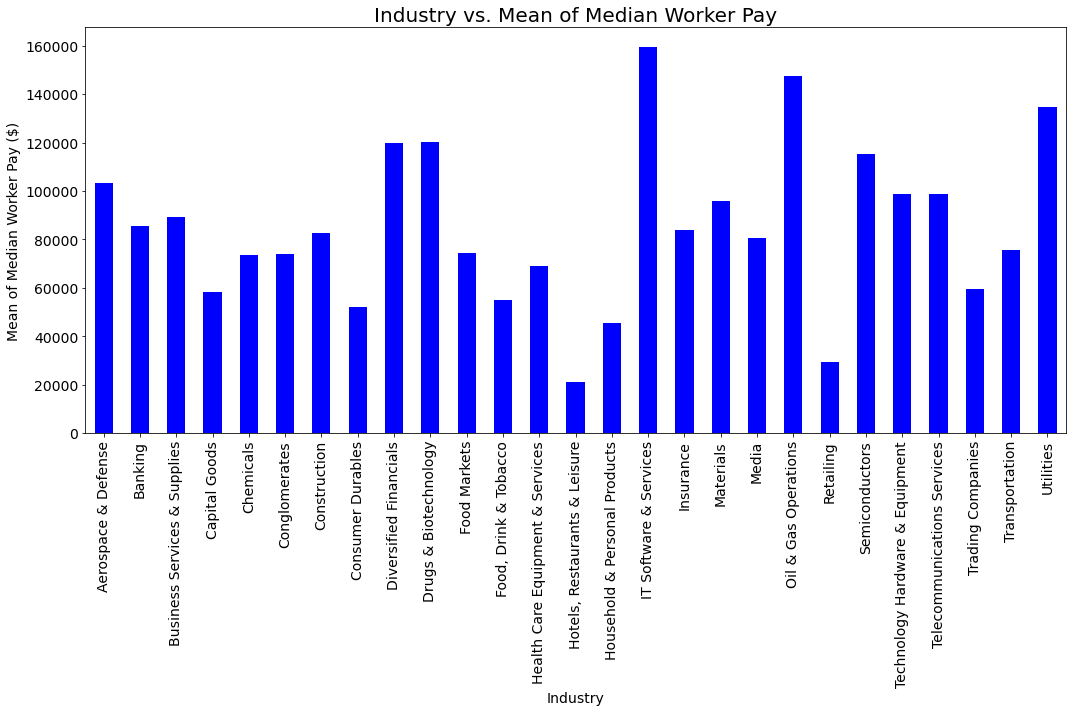

In [9]:
#Do industries that CEOs work in and their workers work in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["Median Worker Pay"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Mean of Median Worker Pay ($)",fontsize = 14)
plt.title("Industry vs. Mean of Median Worker Pay",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/MedWorker_PerIndustry.png")

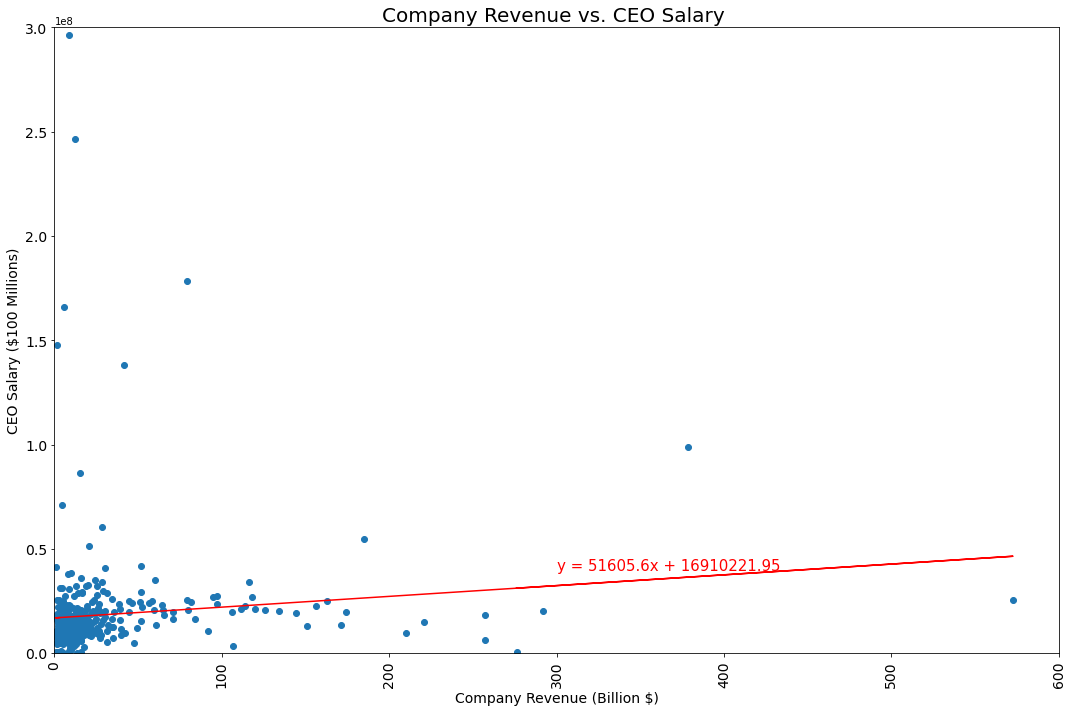

In [25]:
#Do CEOs and their workers earn more as their companies earn more?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)",fontsize = 14)
    plt.xlim([0,600])
    plt.ylim([0,300000000])
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($100 Millions)",(300,40000000))
# Save the figure
plt.savefig("../Visuals/RevenuevCEO.png")

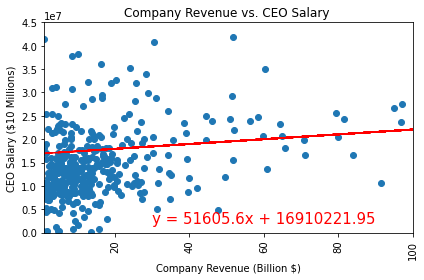

In [26]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xlim([1,100])
    plt.ylim([0,45000000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($10 Millions)",(30,2000000))
# Save the figure
plt.savefig("../Visuals/RevenuevCEOZoomed.png")

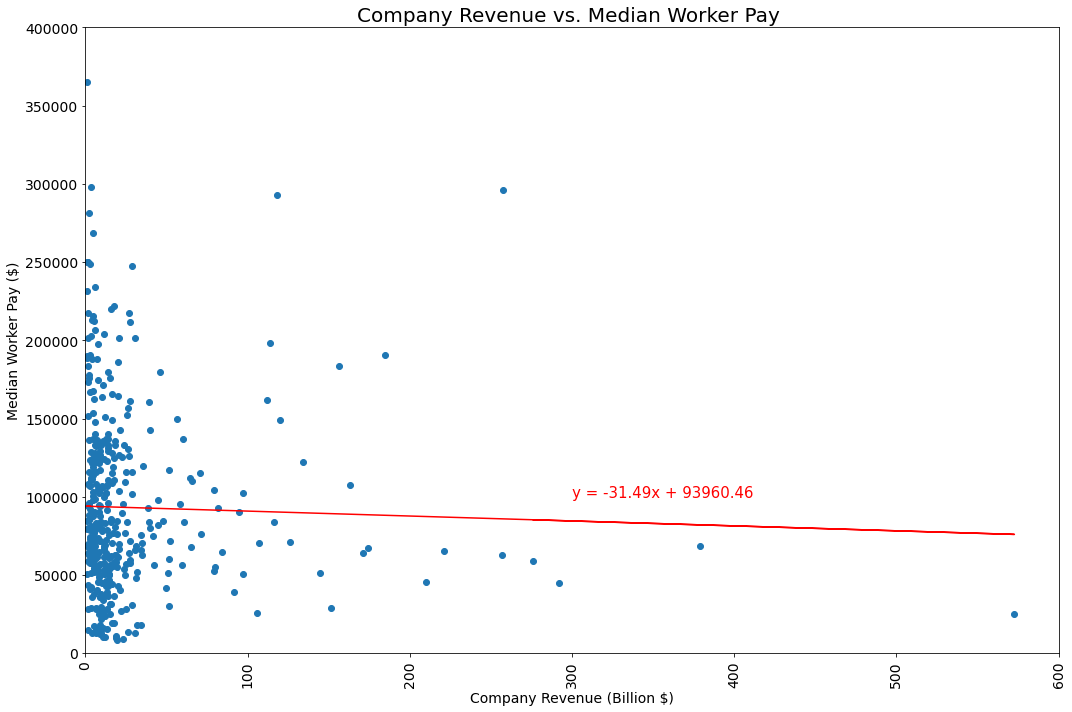

In [12]:
#Do CEOs and their workers earn more as their companies earn more?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title, fontsize = 20)
    plt.xlim([0,600])
    plt.ylim([0,400000])
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)", fontsize = 14)
    plt.xticks(rotation=90, fontsize = 14)
    plt.ylabel(ylab, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(300,100000))
# Save the figure
plt.savefig("../Visuals/RevenuevWorker.png")

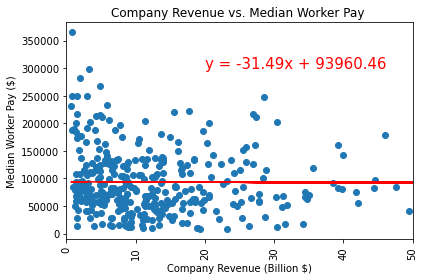

In [13]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.xlim([0,50])
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(20,300000))
# Save the figure
plt.savefig("../Visuals/RevenuevWorkerZoomed.png")

0.15382623191804226


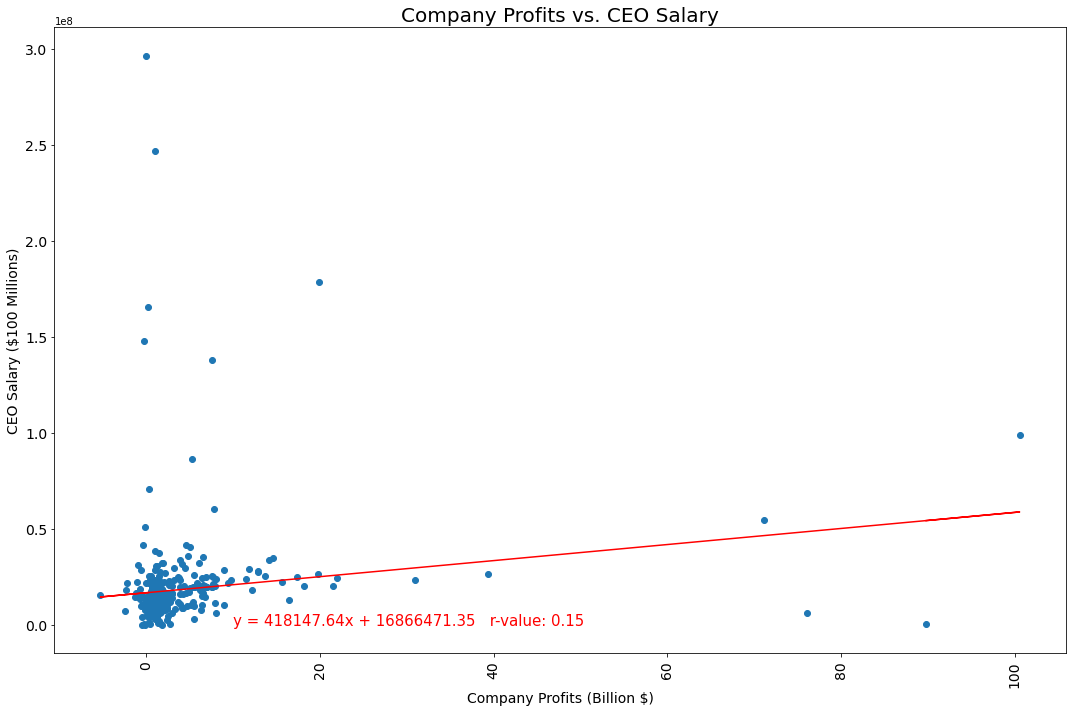

In [45]:
#Do CEOs and their workers earn more as their companies profit?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "   r-value: " + str(round(r_value,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = merged_df["Profits (Billions)"]
yval = merged_df["CEO Salary"]
r_value = linreg(xval,yval,"Company Profits vs. CEO Salary","CEO Salary ($100 Millions)",(10,200))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvCEO.png")

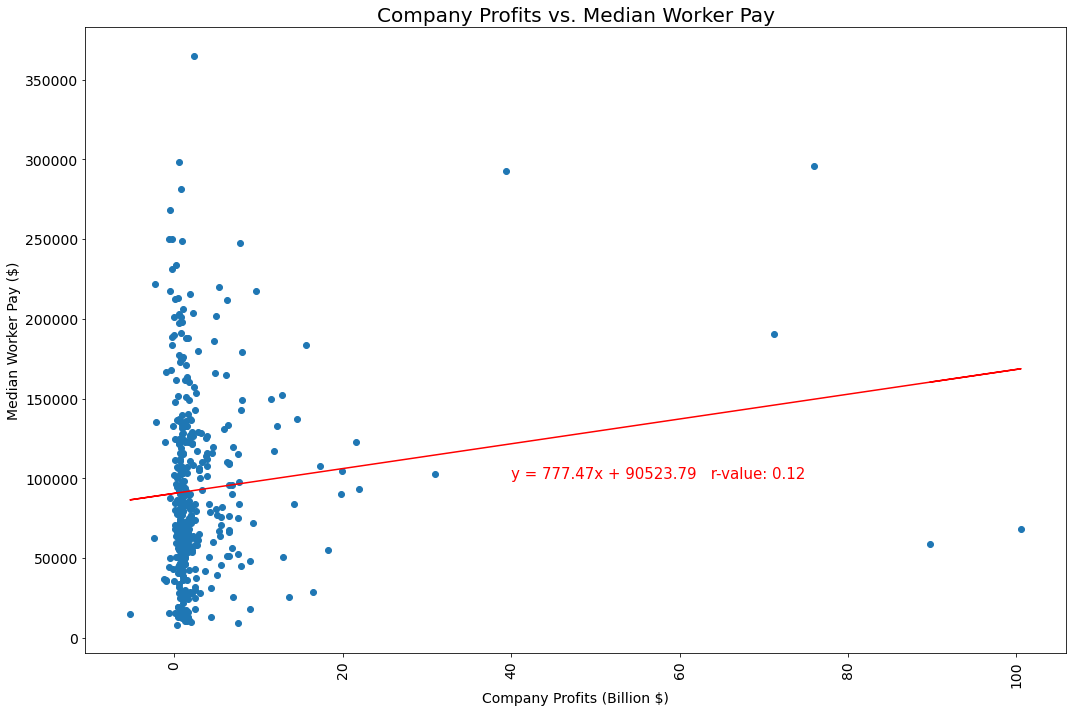

In [44]:
#Do CEOs and their workers earn more as their companies profit?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "   r-value: " + str(round(r_value,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
xval = merged_df["Profits (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Profits vs. Median Worker Pay","Median Worker Pay ($)",(40,100000))
# Save the figure
plt.savefig("../Visuals/ProfitvWorker.png")

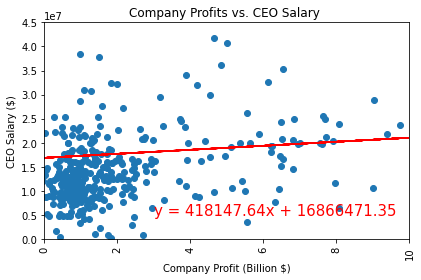

In [16]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profit (Billion $)")
    plt.xlim([0,10])
    plt.ylim([0,45000000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Profits (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Profits vs. CEO Salary ","CEO Salary ($)",(3,5000000))
# Save the figure
plt.savefig("../Visuals/ProfitsvCEOZoomed.png")

0.12314769809693897


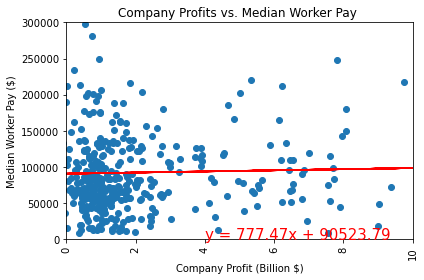

In [17]:

#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profit (Billion $)")
    plt.xlim([0,10])
    plt.ylim([0,300000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()
    return r_value 
xval = merged_df["Profits (Billions)"]
yval = merged_df["Median Worker Pay"]
r_value = linreg(xval,yval,"Company Profits vs. Median Worker Pay ","Median Worker Pay ($)",(4,50))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitsvWorkersZoomed.png")

In [52]:
#Correlation Heatmap
ceo_corr = merged_df[["CEO Salary","Median Worker Pay","Revenue (Billions)", "Profits (Billions)", "Market Value (Billions)"]].corr()
ceo_corr = ceo_corr.style.background_gradient(cmap='coolwarm')
ceo_corr

,CEO Salary,Median Worker Pay,Revenue (Billions),Profits (Billions),Market Value (Billions)
CEO Salary,1.000000,0.129517,0.107613,0.153826,0.197893
Median Worker Pay,0.129517,1.000000,-0.028270,0.123148,0.147513
Revenue (Billions),0.107613,-0.028270,1.000000,0.629248,0.587355
Profits (Billions),0.153826,0.123148,0.629248,1.000000,0.898763
Market Value (Billions),0.197893,0.147513,0.587355,0.898763,1.000000


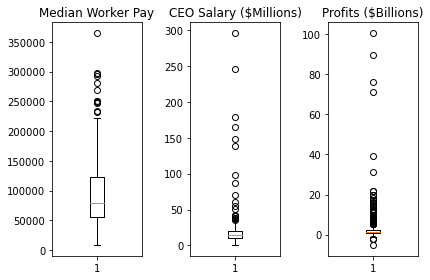

In [47]:
x = merged_df["Median Worker Pay"]
y = merged_df["CEO Salary"]/1000000
z = merged_df["Profits (Billions)"]

fig, axs = plt.subplots(1,3)

axs[0].boxplot(x)
axs[0].set_title("Median Worker Pay")

axs[1].boxplot(y)
axs[1].set_title("CEO Salary ($Millions)")

axs[2].boxplot(z)
axs[2].set_title("Profits ($Billions)")

fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9,wspace=0.4,hspace=0.4)
plt.tight_layout()
plt.savefig("../Visuals/BoxPlot.png")

In [22]:
no_outliers_workers = merged_df.loc[merged_df["Median Worker Pay"] < 200000,:]
no_outliers_ceos = merged_df.loc[merged_df["CEO Salary"] < 50000000,:]
no_outliers_profit = no_outliers_ceos.loc[no_outliers_ceos["Profits (Billions)"] < 5,:]

In [53]:
# Correlation Heatmap without outliers
ceo_corr = no_outliers_profit[["CEO Salary","Median Worker Pay","Revenue (Billions)", "Profits (Billions)", "Market Value (Billions)"]].corr()
ceo_corr = ceo_corr.style.background_gradient(cmap='coolwarm')
ceo_corr

,CEO Salary,Median Worker Pay,Revenue (Billions),Profits (Billions),Market Value (Billions)
CEO Salary,1.000000,0.045258,0.147215,0.209395,0.378760
Median Worker Pay,0.045258,1.000000,-0.060864,-0.022449,0.127812
Revenue (Billions),0.147215,-0.060864,1.000000,0.140687,0.125950
Profits (Billions),0.209395,-0.022449,0.140687,1.000000,0.453471
Market Value (Billions),0.378760,0.127812,0.125950,0.453471,1.000000


0.20939453658593346


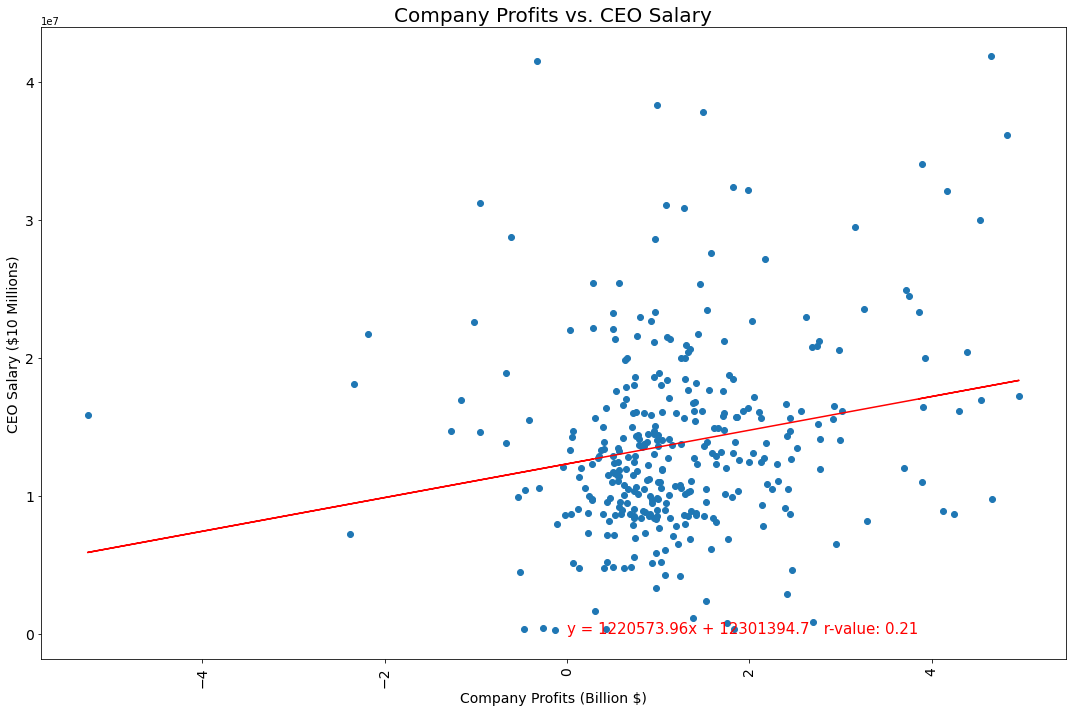

In [43]:
#Profits vs CEO without outliers
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "   r-value: " + str(round(r_value,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = no_outliers_profit["Profits (Billions)"]
yval = no_outliers_profit["CEO Salary"]
r_value = linreg(xval,yval,"Company Profits vs. CEO Salary","CEO Salary ($10 Millions)",(0,0))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvCEO_outliers.png")

-0.022449172486062725


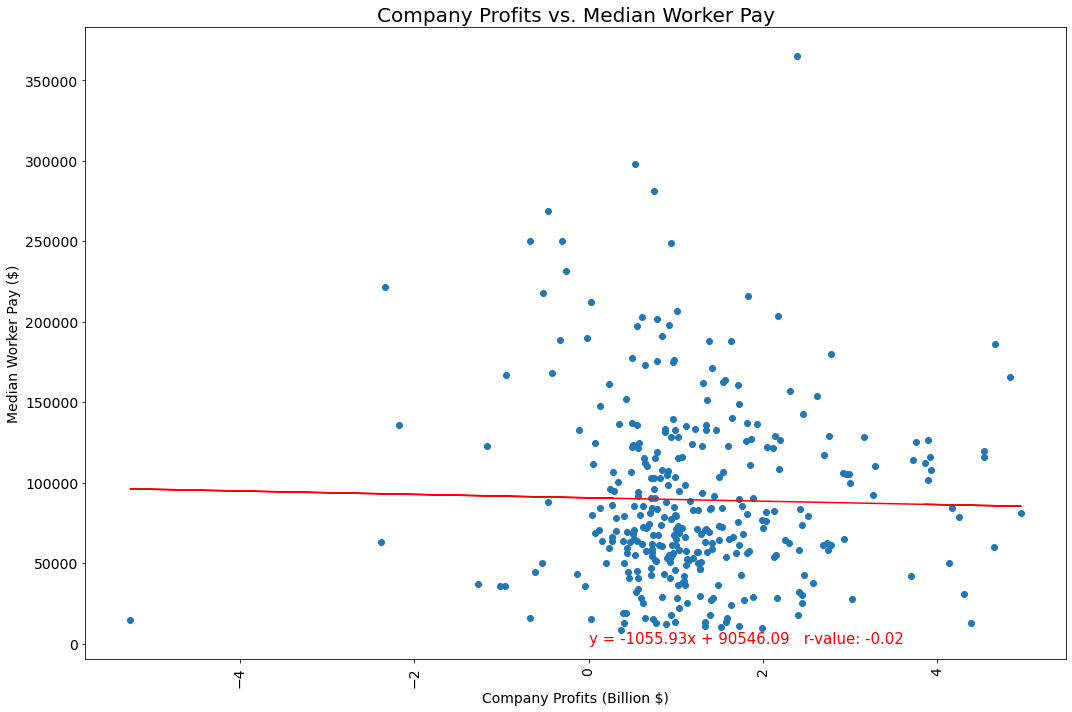

In [42]:
#Profits vs Median Worker without outliers
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "   r-value: " + str(round(r_value,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = no_outliers_profit["Profits (Billions)"]
yval = no_outliers_profit["Median Worker Pay"]
r_value = linreg(xval,yval,"Company Profits vs. Median Worker Pay","Median Worker Pay ($)",(0,0))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvWorker_outliers.png")